In [15]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
import math
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import scipy.io
from sklearn.utils import resample

## Create main dataframe

In [16]:
mat_file= scipy.io.loadmat('LOSS.mat')
mat_file_pay = scipy.io.loadmat('PAY.mat')


df6 = pd.DataFrame(np.array(mat_file['LOSS']))
df6.columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']
df6.insert(len(df6.columns),'Loss', 1)

df7 = pd.DataFrame(np.array(mat_file_pay['PAY']))
df7.columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']
df7.insert(len(df7.columns),'Loss', 0)

final_data = pd.concat([df6,df7], ignore_index = True)

final_data.head()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Renovation,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Loss
0,697399.0,1.35,69.4,7250000.0,5.25,0.0312,5.2188,1998.0,100.0,22919.0,7.663725,351.880464,1.136903,4.144921,0.143158,0.127688,5.0,1
1,1088638.0,1.36,61.3,9100000.0,5.52,0.0312,5.4888,1984.0,95.4,23129.0,8.779339,463.441807,1.502204,4.144921,0.310453,0.242793,21.0,1
2,618081.0,1.31,66.0,6650000.0,5.45,0.0312,5.4188,2001.0,87.2,32504.0,7.358107,293.888839,1.076208,4.419219,0.110992,0.101224,2.0,1
3,260695.0,1.55,64.2,2600000.0,5.21,0.1112,5.0988,1965.0,100.0,32376.0,7.781940,353.971808,3.315033,4.242222,0.117658,0.080235,40.0,1
4,607133.0,1.26,65.8,6500000.0,5.29,0.0312,5.2588,1970.0,100.0,12942.0,7.404061,316.183875,2.961139,4.242222,0.274014,0.196397,4.0,1


## Data Exploration

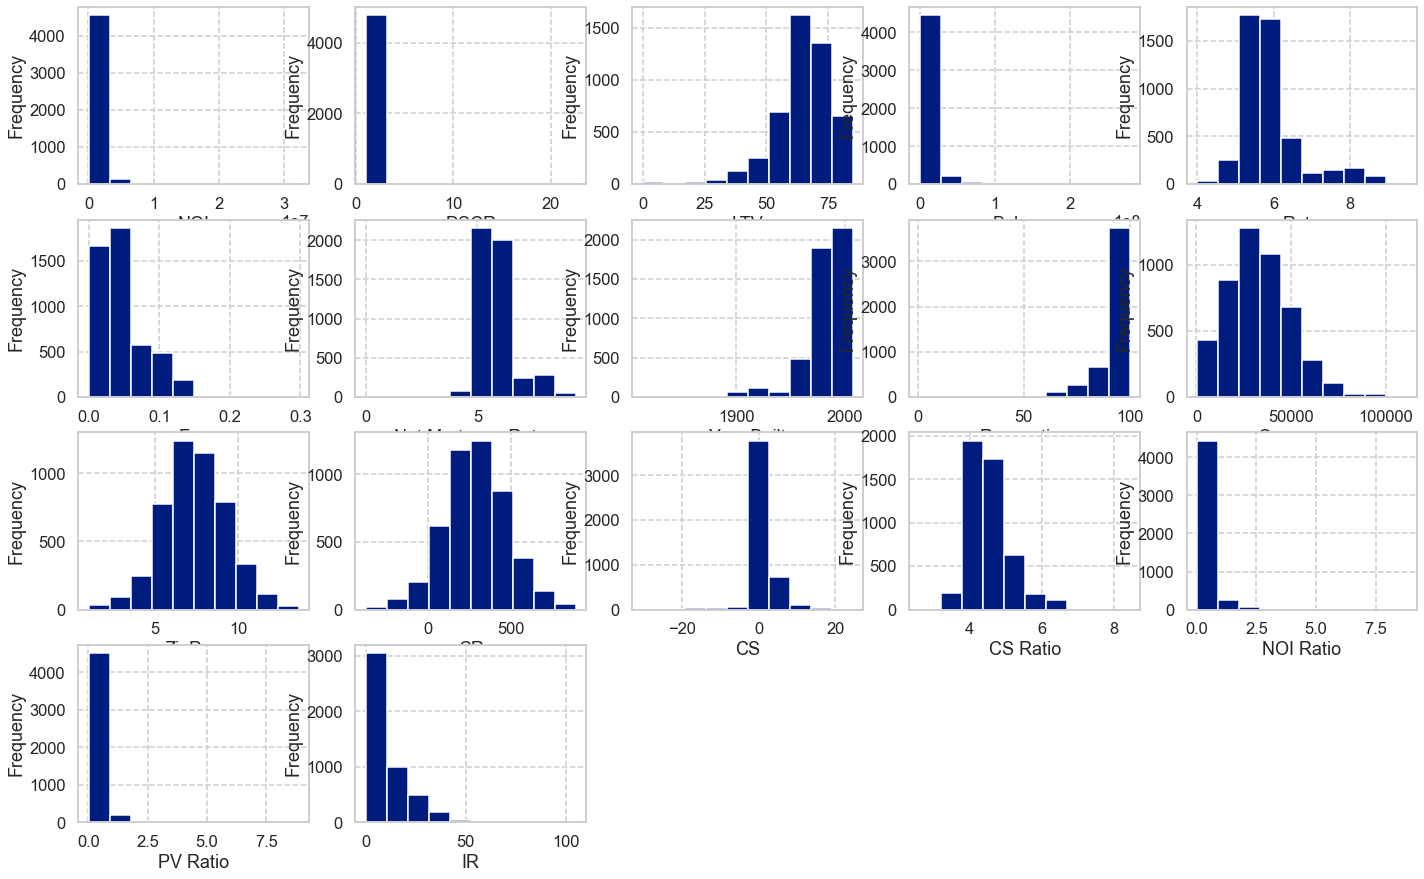

In [17]:
data_vars = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']

# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(data_vars)):
    var = data_vars[i]
    sub = fig.add_subplot(4, 5, i+1)
    sub.set_xlabel(var)
    final_data[var].plot(kind = 'hist')

In [18]:
final_data.describe()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Renovation,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Loss
count,4.793000e+03,4793.000000,4793.000000,4.793000e+03,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.00000
mean,1.135957e+06,1.429987,64.861977,1.119308e+07,5.894332,0.047316,5.846250,1982.492176,93.676208,33091.251826,7.406222,289.076120,1.726786,4.515461,0.381018,0.337364,10.615898,0.20217
std,2.076234e+06,0.437178,11.342534,1.845383e+07,0.800901,0.030710,0.797688,20.795350,8.531721,16771.824847,1.917078,190.927369,3.455501,0.526445,0.609334,0.582676,11.096348,0.40166
min,3.924600e+04,0.996634,0.000000,4.340000e+05,3.990000,0.000000,0.000000,1814.000000,1.000000,296.000000,1.035800,-376.933343,-30.138210,2.618871,0.010615,0.011394,0.000000,0.00000
25%,3.399140e+05,1.250000,59.880000,3.250000e+06,5.400000,0.021000,5.358900,1974.000000,91.200000,21509.000000,6.139585,165.687500,0.858865,4.167500,0.114293,0.099423,2.000000,0.00000
50%,6.238900e+05,1.348000,66.370000,6.000000e+06,5.730000,0.041100,5.679500,1986.000000,96.300000,31834.000000,7.344710,286.512964,1.402948,4.424921,0.213671,0.182186,6.000000,0.00000
75%,1.165337e+06,1.490000,72.500000,1.175000e+07,6.100000,0.060800,6.056300,1998.000000,100.000000,43194.000000,8.683090,412.768029,2.263114,4.683710,0.418939,0.355228,17.000000,0.00000
max,3.224520e+07,22.547666,85.059726,2.800000e+08,9.480000,0.297500,9.397900,2007.000000,100.000000,111086.000000,13.645246,893.220506,24.541130,8.430625,8.801899,8.858678,105.000000,1.00000


- 20% of the observations are default

In [19]:
final_data.isnull().sum()

NOI                  0
DSCR                 0
LTV                  0
Balance              0
Rate                 0
Fee                  0
Net Mortgage Rate    0
Year Built           0
Renovation           0
Occupancy            0
ZipPop               0
CR                   0
CS                   0
CS Ratio             0
NOI Ratio            0
PV Ratio             0
IR                   0
Loss                 0
dtype: int64

## Correlation Matrix and Heatmap

In [22]:
final_data.corr()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Renovation,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Loss
NOI,1.000000,0.122950,-0.015557,0.904979,-0.092564,-0.099187,-0.088382,-0.004661,-0.097906,-0.099355,-0.039261,-0.031610,-0.013732,-0.028327,0.941002,0.938568,-0.025669,-0.033794
DSCR,0.122950,1.000000,-0.400696,0.038571,-0.158859,-0.006513,-0.158908,-0.057814,-0.055856,-0.027073,0.062389,0.099111,0.028159,-0.132254,0.142474,0.162486,0.022581,-0.094803
LTV,-0.015557,-0.400696,1.000000,0.088660,0.072736,0.007184,0.074860,0.106693,0.035194,-0.018046,-0.037836,-0.072655,0.022562,0.125718,-0.018622,-0.033788,-0.051427,0.185997
Balance,0.904979,0.038571,0.088660,1.000000,-0.134484,-0.141188,-0.128766,-0.004555,-0.082617,-0.078491,-0.181428,-0.172316,-0.058362,-0.035737,0.842617,0.872621,-0.037524,-0.016545
Rate,-0.092564,-0.158859,0.072736,-0.134484,1.000000,0.265024,0.993967,-0.052757,0.016078,-0.027228,0.356323,0.143955,0.030534,0.775484,-0.087840,-0.111365,-0.041804,0.045590
Fee,-0.099187,-0.006513,0.007184,-0.141188,0.265024,1.000000,0.230023,0.022689,0.063613,-0.007794,0.264194,0.228534,-0.025352,0.133246,-0.085985,-0.085975,-0.002223,-0.020853
Net Mortgage Rate,-0.088382,-0.158908,0.074860,-0.128766,0.993967,0.230023,1.000000,-0.050146,0.014589,-0.025839,0.347239,0.135462,0.030513,0.773203,-0.084010,-0.107677,-0.040708,0.047168
Year Built,-0.004661,-0.057814,0.106693,-0.004555,-0.052757,0.022689,-0.050146,1.000000,-0.033207,0.086123,-0.028604,-0.018969,0.033025,-0.035368,-0.000924,-0.009677,-0.287432,0.010995
Renovation,-0.097906,-0.055856,0.035194,-0.082617,0.016078,0.063613,0.014589,-0.033207,1.000000,0.071285,-0.074684,-0.095288,-0.083508,0.073618,-0.163542,-0.102381,0.072179,-0.045576
Occupancy,-0.099355,-0.027073,-0.018046,-0.078491,-0.027228,-0.007794,-0.025839,0.086123,0.071285,1.000000,-0.088917,-0.087453,0.005195,-0.006626,-0.097969,-0.088293,0.047940,-0.020596


<AxesSubplot:>

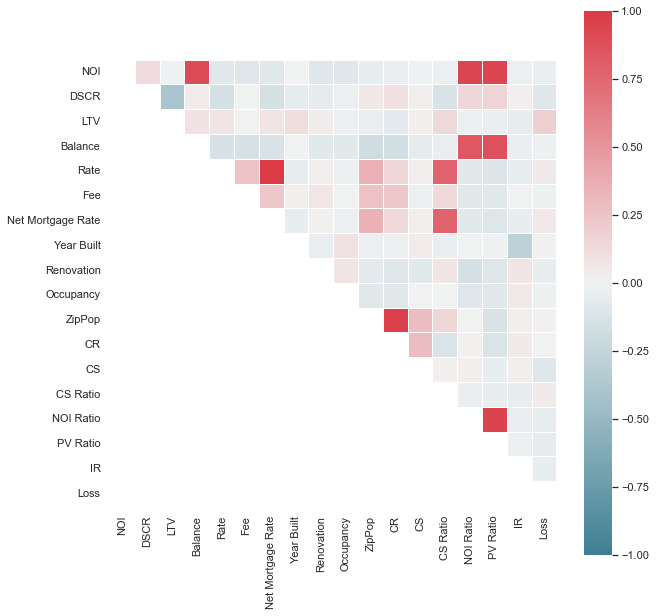

In [23]:
dataViz = final_data
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10)) 
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)



IMPORTANT: correlation before or after scaling, does it make a difference?

## Bivariate relations

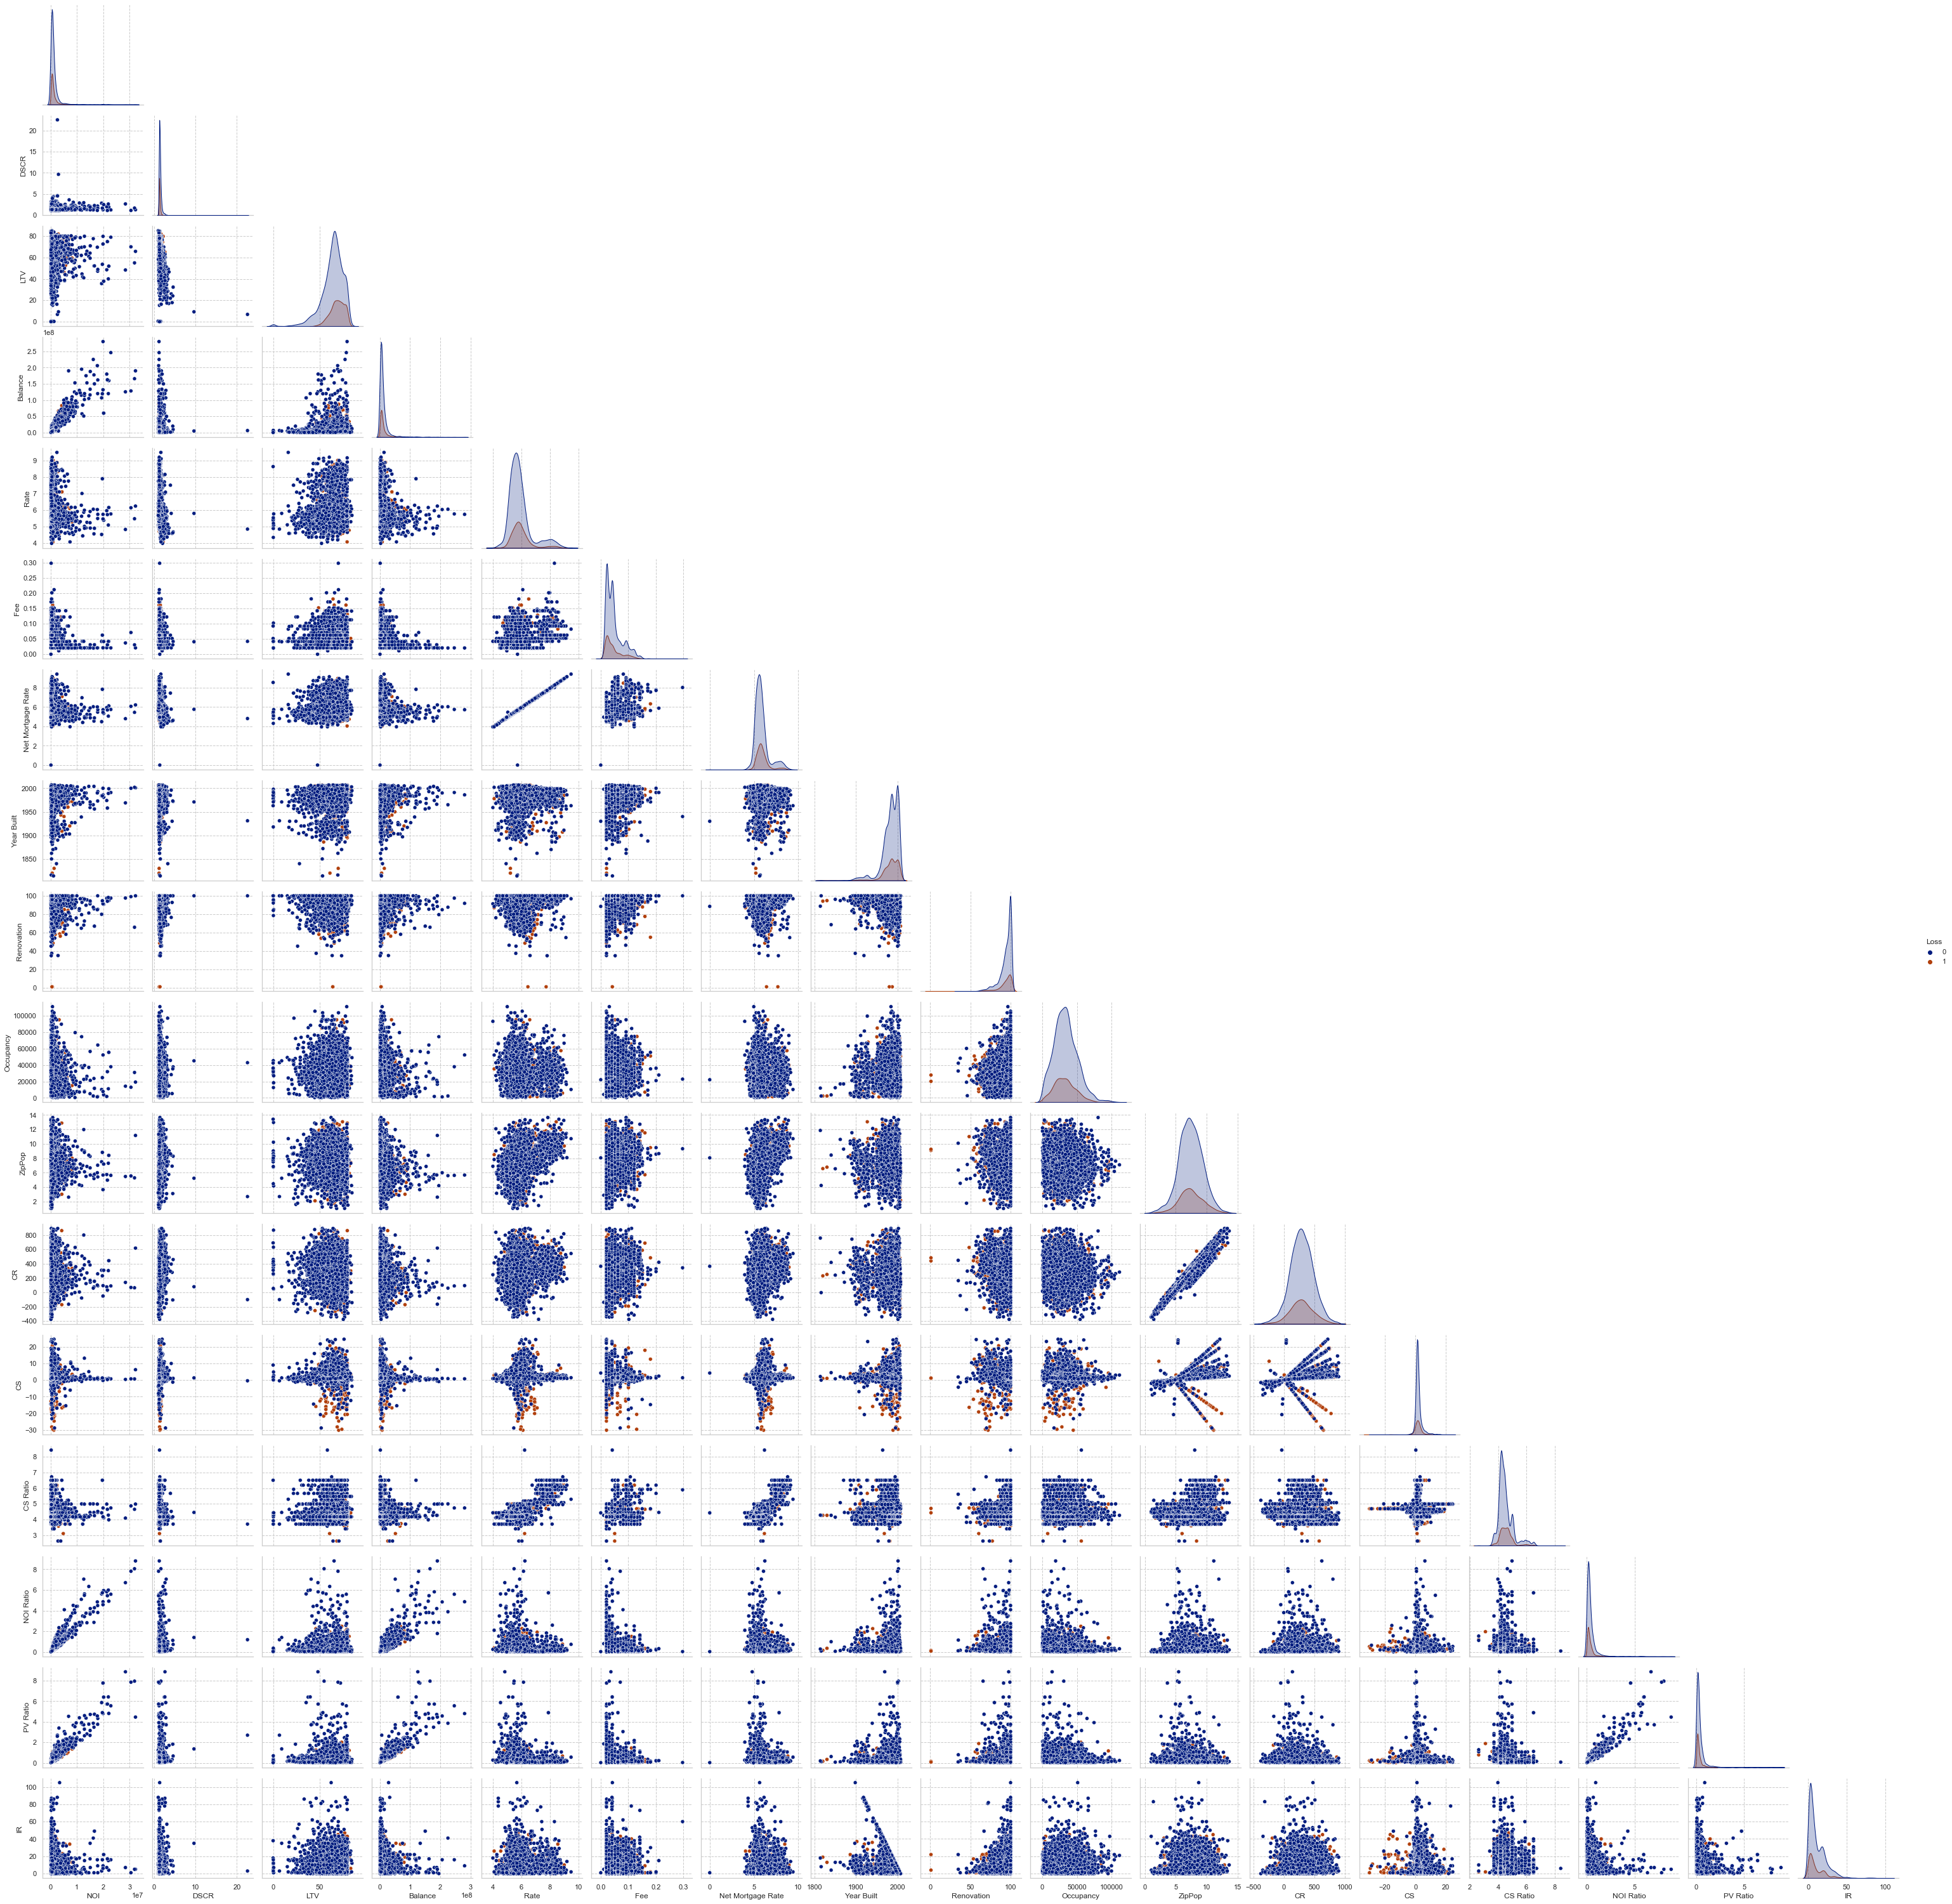

In [24]:
sns_plot = sns.pairplot(final_data, hue="Loss",corner=True)

## Scale the data

In [25]:
scl = preprocessing.StandardScaler() #instance of preprocessing
fields = final_data.columns.values[:-1]


data_norm = pd.DataFrame(scl.fit_transform(final_data[fields]), columns = fields)
data_norm['Loss'] = final_data['Loss']
data_norm['Loss'].value_counts()

data_norm.head()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Renovation,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Loss
0,-0.211250,-0.182981,0.400131,-0.213695,-0.804593,-0.524847,-0.786668,0.745813,0.741287,-0.606572,0.134334,0.328978,-0.170726,-0.703928,-0.390401,-0.359887,-0.506156,1
1,-0.022793,-0.160105,-0.314070,-0.113434,-0.467438,-0.524847,-0.448155,0.072515,0.202066,-0.594049,0.716329,0.913352,-0.064999,-0.703928,-0.115818,-0.162322,0.935910,1
2,-0.249456,-0.274487,0.100343,-0.246212,-0.554848,-0.524847,-0.535917,0.890091,-0.759153,-0.035018,-0.025101,0.025210,-0.188293,-0.182835,-0.443195,-0.405310,-0.776544,1
3,-0.421606,0.274547,-0.058368,-0.465701,-0.854542,2.080462,-0.937119,-0.841246,0.741287,-0.042650,0.196005,0.339933,0.459676,-0.519081,-0.432254,-0.441335,2.648364,1
4,-0.254730,-0.388869,0.082708,-0.254341,-0.754644,-0.524847,-0.736518,-0.600782,0.741287,-1.201500,-0.001128,0.141994,0.357251,-0.519081,-0.175626,-0.241956,-0.596285,1


IMPORTANT: should we scale everything or not?

## Split the data into training and testing

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_norm.iloc[:,:-1], data_norm.iloc[:,-1], test_size=0.3, random_state=31)


## Plot Functions (AUC & Confusion Matrix)

In [27]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1,rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [28]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Forward and backward stepwise selections

Use forward and backward stepwise selections and obtain the best models.

Compare above models (forward, backward and best).

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import f1_score as f1
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf= LogisticRegression(C=10, solver='liblinear', max_iter=100, n_jobs=None)

sfs = SFS(clf, n_features_to_select=10, direction='forward', scoring='f1', cv=10)
sfs = sfs.fit(X_train,y_train)


labels = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']
res = [i for i, val in enumerate(sfs.support_) if val]

forward_features = []
for i in res:
    forward_features.append(i)

sfs = SFS(clf, n_features_to_select=10, direction='backward',scoring='f1', cv=10)
sfs = sfs.fit(X_train,y_train)

backward =[]
res = [i for i, val in enumerate(sfs.support_) if val]
backward_features =[]
for i in res:
    backward_features.append(i)
    
    



Makes sense to use PCA or RFE?

## Logistic Regression

Use logistic regression to predict the default of commercial real estate properties. Look at
a summary of the fit and interpret the results. Do the results appear to agree with your
exploratory analysis?

### GridSearchCV for Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [100,10, 1, .1, 0.01, 0.001,],
               'solver': ['newton-cg', 'liblinear', 'lbfgs'],
                 'max_iter': [100, 200, 1000]}

model = LogisticRegression(random_state=42) 

grid = GridSearchCV(model, param_grid, n_jobs = -1, refit = False, verbose=1, return_train_score = True, scoring = {'accuracy'})
grid.fit(X_train, y_train)

results = pd.DataFrame(grid.cv_results_)

results = results.sort_values(by = ['mean_test_accuracy'], ascending = False)

best_results = results.iloc[0]

PARAMS = best_results['params']

print("Best params: ", PARAMS)

best_model = model.set_params(**PARAMS)
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best params:  {'C': 0.001, 'max_iter': 100, 'solver': 'liblinear'}


LogisticRegression(C=0.001, random_state=42, solver='liblinear')

### Logistic Regression

Logistic regression accuracy is  0.8212795549374131


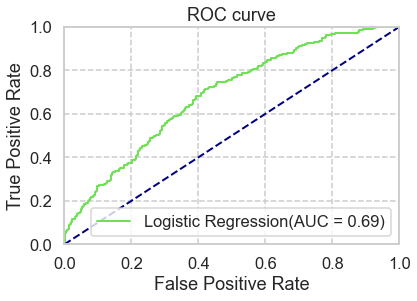

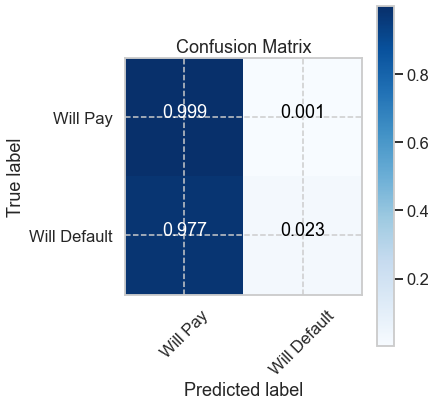

In [34]:
clf_LR = linear_model.LogisticRegression(C=0.001, max_iter = 100, random_state=42, solver='liblinear')
clf_LR.fit(X_train,y_train)
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)


plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(LR_Predict_bin, normalize=True)
plt.show()

## Step 6

Use two machine learning techniques such as support vector machine, random forest,
neural networks, bagging, XGBoost, boosting, and classification tree to predict defaults for
commercial real estate property loans.

## Random Forest with randomized search

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [36]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [37]:
## Evaluate Random Search
 
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
    
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 3.9199 degrees.
Accuracy = 93.36%.


best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

Model Performance
Average Error: 3.7152 degrees.
Accuracy = 93.73%.


print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

SyntaxError: invalid syntax (1056656331.py, line 18)

In [ ]:
## Grid Search with Cross Validation

To use Grid Search, we make another grid based on the best values provided by random search:


from sklearn.model_selection import GridSearchCV

#Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

#Create a based model
rf = RandomForestRegressor()

#Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

## Using the best from Randomized Search CV

In [ ]:
randomForest = RandomForestClassifier(n_estimators = 400, min_samples_split = 10, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 90, bootstrap = True)
randomForest.fit(X_train,y_train)
rfPredict = randomForest.predict(X_test)
rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,rfPredict)
roc_score = metrics.roc_auc_score(y_test,rfPredict)
print(rfAccuracy)

In [ ]:
plotAUC(y_test,rfPredictproba, 'Random Forest')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(rfPredict, normalize=True)
plt.show()

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 1.3min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   8.5s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  18.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  21.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  50.4s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  10.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   6.5s
[CV] END bootstrap=True, max_depth=90,

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  12.0s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  11.3s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   9.7s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  10.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  19.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   9.9s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time= 1.3min
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 1.3min
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=  26.8s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  20.9s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=  11.1s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  17.9s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 1.1min
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   8.6s
[CV] END bootstrap=True, max_depth=10

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   9.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   8.3s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  46.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   9.6s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time= 1.2min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   5.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 1.1min
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  12.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   6.8s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 1.0min
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time= 1.4min
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time= 1.4min
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  13.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  42.3s
[CV] END bootstrap=False, max_d